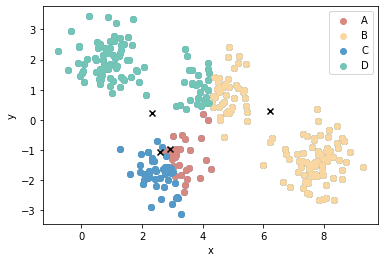

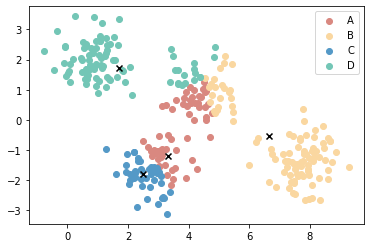

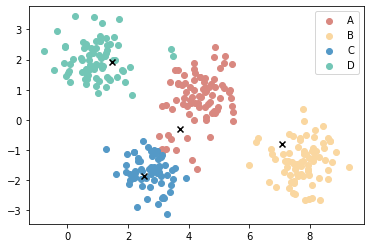

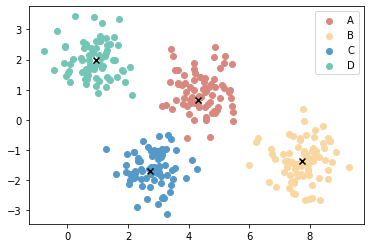

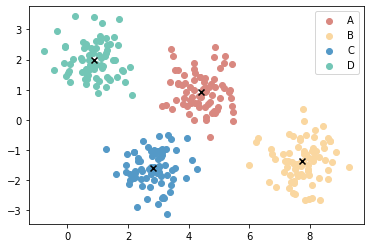

In [19]:
#3-1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math


cdata = pd.read_csv("cdata.csv")
cdata_deep = cdata.copy()                                                               #複製dataframe

scatter = plt.scatter(cdata["x"], cdata["y"])                                           #繪製散佈圖
plt.xlabel("x")
plt.ylabel("y")


k = 4
randX = []
randY = []

for i in range(k):                                                                      #隨機選擇centroid
    randX.append(random.choice(cdata_deep["x"]))
    randY.append(random.choice(cdata_deep["y"]))
    cdata_deep["x"].drop(labels = cdata[cdata_deep["x"].values == randX[i]].index)
    cdata_deep["y"].drop(labels = cdata[cdata_deep["y"].values == randY[i]].index)




def grouping(listA, listB):                                                             #分群
    
    centroidList = [-1] * len(cdata)                                                    #建立清單來儲存centroid編號

    for i in range(len(cdata)):                                                         #儲存每個點最近的centroid
        minDist = 50
    
        for j in range(k):
            distance = math.dist([cdata["x"][i], cdata["y"][i]], [listA[j], listB[j]])
            if distance <= minDist:
                minDist = distance
                centroidList[i] = j
    #centroid = pd.Series(centroid)
            
    centroidList = pd.Series(centroidList)
    
    a = centroidList.groupby(centroidList).get_group(0)
    b = centroidList.groupby(centroidList).get_group(1)
    c = centroidList.groupby(centroidList).get_group(2)
    d = centroidList.groupby(centroidList).get_group(3)
            
    colors = ["#D98880", "#FAD7A0", "#5499C7", "#73C6B6"]                               #紅黃藍綠     
    
    for i in range(len(a.index)):                                                       #根據 cluster A 繪圖
        aplt = plt.scatter(cdata["x"][a.index[i]], cdata["y"][a.index[i]],
                           color = colors[0])

    for i in range(len(b.index)):                                                       #根據 cluster B 繪圖
        bplt = plt.scatter(cdata["x"][b.index[i]], cdata["y"][b.index[i]],
                           color = colors[1])

    for i in range(len(c.index)):                                                       #根據 cluster C 繪圖
        cplt = plt.scatter(cdata["x"][c.index[i]], cdata["y"][c.index[i]],
                           color = colors[2])

    for i in range(len(d.index)):                                                       #根據 cluster D 繪圖
        dplt = plt.scatter(cdata["x"][d.index[i]], cdata["y"][d.index[i]],
                           color = colors[3])
    
    plt.legend(handles = [aplt, bplt, cplt, dplt], labels = ["A", "B", "C", "D"])       #標上legend
    
    return centroidList



centroid = grouping(randX, randY)                                                
originalCentroid = centroid.copy()                                                      #複製centroid，以便之後比對centroid的改變

plt.scatter(randX, randY, marker = "x", color = "black")                                #標記centroid的位置
plt.show()
 

def reCentroid(centroidList):                                                           #找出新的centroids

    xMean = [[] for i in range(k)]
    yMean = [[] for i in range(k)]
   
    for i in range(k):                                                                  #算出每個cluster的x, y平均值
        findXmean = []
        findYmean = []    
        grouped = centroidList.groupby(centroidList).get_group(i)
        idxList = grouped.index
    
        for j in range(len(idxList)):
            findXmean.append(cdata["x"][idxList[j]])
            findYmean.append(cdata["y"][idxList[j]])
    
        xMean[i] = round(np.mean(findXmean), 4)
        yMean[i] = round(np.mean(findYmean), 4)

    return xMean, yMean



while True:                                                                             #重複執行grouping和reCentroid

    newCentroidX, newCentroidY = reCentroid(centroid)
    centroid = grouping(newCentroidX, newCentroidY)
    
    plt.scatter(newCentroidX, newCentroidY, marker = "x", color = "black")
    
    if sum(i != j for i, j in zip(centroid, originalCentroid)) < 3:                     #比較新圖、舊圖變化量，差異小於3就break
        break                                                         
    
    plt.show()

    originalCentroid = centroid.copy()

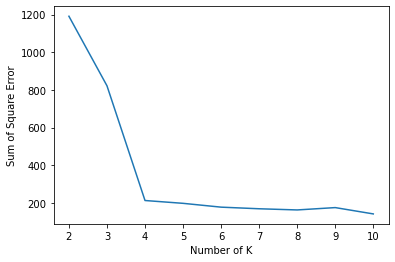

In [1]:
#3-2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math


sse = []
Ks = list(range(2, 11))


for k in range(2, 11):
    cdata = pd.read_csv("cdata.csv")
    cdata_deep = cdata.copy()                                                               #複製dataframe
    randX = []
    randY = []

    for i in range(k):                                                                      #隨機選擇centroid
        randX.append(random.choice(cdata_deep["x"]))
        randY.append(random.choice(cdata_deep["y"]))
        cdata_deep["x"].drop(labels = cdata[cdata_deep["x"].values == randX[i]].index)
        cdata_deep["y"].drop(labels = cdata[cdata_deep["y"].values == randY[i]].index)




    def grouping(listA, listB):                                                             #分群
    
        centroidList = [-1] * len(cdata)                                                    #建立清單來儲存centroid編號
        sqDistList = [-1] * len(cdata)
    
        for i in range(len(cdata)):                                                         #儲存每個點最近的centroid
            minDist = 50
    
            for j in range(k):
                distance = math.dist([cdata["x"][i], cdata["y"][i]], [listA[j], listB[j]])
                if distance <= minDist:
                    minDist = distance
                    centroidList[i] = j
                    sqDistList[i] = distance ** 2                                           #計算square error
    
        return centroidList, sqDistList



    centroid, sqDist = grouping(randX, randY)
    #centroid = pd.Series(centroid)
    originalCentroid = [i for i in centroid]                                                #複製centroid
    

 

    def reCentroid(centroidList, listA, listB):                                             #找出新的centroids

        xMean = [[] for i in range(k)]
        yMean = [[] for i in range(k)]
   
        for i in range(k):                                                                  #算出每個cluster的x, y平均值
            findXmean = []
            findYmean = []
            
            
            if i not in centroidList:                                                       #確認centroid存在
                xMean[i] = listA[i]
                yMean[i] = listB[i]
            
            else:
                centroidList = pd.Series(centroidList)
                grouped = centroidList.groupby(centroidList).get_group(i)
                idxList = grouped.index
    
                for j in range(len(idxList)):
                    findXmean.append(cdata["x"][idxList[j]])
                    findYmean.append(cdata["y"][idxList[j]])
    
                xMean[i] = round(np.mean(findXmean), 4)
                yMean[i] = round(np.mean(findYmean), 4)
                
                centroidList = centroidList.tolist()

        return xMean, yMean



    newCentroidX, newCentroidY = reCentroid(centroid, randX, randY)    

        
        
    while True:                                                                             #重複執行grouping和reCentroid

        centroid, sqDist = grouping(newCentroidX, newCentroidY)
        
        if sum(i != j for i, j in zip(centroid, originalCentroid)) < 3:                     #比較新圖、舊圖變化量，差異小於3就break
            break
            
        originalCentroid = [i for i in centroid]
        
        #centroid = pd.Series(centroid)
        
        newCentroidX, newCentroidY = reCentroid(centroid, newCentroidX, newCentroidY)
    
    
    
    sse.append(sum(sqDist))                                                                #計算sse

    
plt.plot(Ks, sse)
plt.xlabel("Number of K")
plt.ylabel("Sum of Square Error")
plt.show()

(100.0, 160.0)

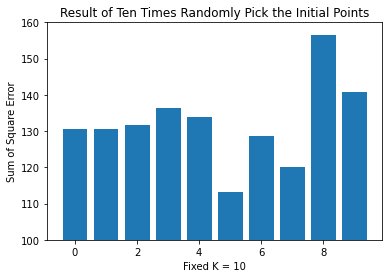

In [3]:
#3-3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math


sse = []
k = 10

for rounds in range(10):
    
    cdata = pd.read_csv("cdata.csv")
    cdata_deep = cdata.copy()                                                               #複製dataframe
    randX = []
    randY = []

    for i in range(k):                                                                      #隨機選擇centroid
        randX.append(random.choice(cdata_deep["x"]))
        randY.append(random.choice(cdata_deep["y"]))
        cdata_deep["x"].drop(labels = cdata[cdata_deep["x"].values == randX[i]].index)
        cdata_deep["y"].drop(labels = cdata[cdata_deep["y"].values == randY[i]].index)




    def grouping(listA, listB):                                                             #分群
    
        centroidList = [-1] * len(cdata)                                                    #建立清單來儲存centroid編號
        sqDistList = [-1] * len(cdata)
    
        for i in range(len(cdata)):                                                         #儲存每個點最近的centroid
            minDist = 50
    
            for j in range(k):
                distance = math.dist([cdata["x"][i], cdata["y"][i]], [listA[j], listB[j]])
                if distance <= minDist:
                    minDist = distance
                    centroidList[i] = j
                    sqDistList[i] = distance ** 2                                           #計算square error
    
        return centroidList, sqDistList



    centroid, sqDist = grouping(randX, randY)
    #centroid = pd.Series(centroid)
    originalCentroid = [i for i in centroid]                                                #複製centroid
    

 

    def reCentroid(centroidList, listA, listB):                                             #找出新的centroids

        xMean = [[] for i in range(k)]
        yMean = [[] for i in range(k)]
   
        for i in range(k):                                                                  #算出每個cluster的x, y平均值
            findXmean = []
            findYmean = []
            
            
            if i not in centroidList:                                                       #確認centroid存在
                xMean[i] = listA[i]
                yMean[i] = listB[i]
            
            else:
                centroidList = pd.Series(centroidList)
                grouped = centroidList.groupby(centroidList).get_group(i)
                idxList = grouped.index
    
                for j in range(len(idxList)):
                    findXmean.append(cdata["x"][idxList[j]])
                    findYmean.append(cdata["y"][idxList[j]])
    
                xMean[i] = round(np.mean(findXmean), 4)
                yMean[i] = round(np.mean(findYmean), 4)
                
                centroidList = centroidList.tolist()

        return xMean, yMean



    newCentroidX, newCentroidY = reCentroid(centroid, randX, randY)    

        
        
    while True:                                                                             #重複執行grouping和reCentroid

        centroid, sqDist = grouping(newCentroidX, newCentroidY)
        
        if sum(i != j for i, j in zip(centroid, originalCentroid)) < 3:                     #比較新圖、舊圖變化量，差異小於3就break
            break
            
        originalCentroid = [i for i in centroid]
        
        #centroid = pd.Series(centroid)
        
        newCentroidX, newCentroidY = reCentroid(centroid, newCentroidX, newCentroidY)
    
    
    
    sse.append(sum(sqDist))                                                                #計算sse

    


rounds = list(range(0, 10))

plt.bar(rounds, sse)

plt.title("Result of Ten Times Randomly Pick the Initial Points")
plt.xlabel("Fixed K = 10")
plt.ylabel("Sum of Square Error")
plt.ylim([100, 160])